In [1]:
import os
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

import pickle

In [2]:


def Partial_coincidence(coincidences, num_of_coinc):

    percentage_of_repetaed_list = []
    Keys_list = []                          #keys
    Seeds_list = []                         #seeds ehre the key is repeated
    for t in range(len(coincidences)):

        list_of_keys = list(coincidences[t].keys())
        #list_of_values = list(coincidences[t].values())

        keys_list = []  #keys
        seeds_list = [] #seeds ehre the key is repeated
        count = 0
        for key in list_of_keys: # list_of_keys are all the features observed at step t

            #coincidences[t][key] is the list of seeds in which feature "key" is observed at time "t"
            if len(coincidences[t][key]) >= num_of_coinc: #>= because is "at" least

                count += 1
                seeds_list.append(coincidences[t][key])
                keys_list.append(list_of_keys)
        
        Seeds_list.append(seeds_list)
        Keys_list.append(keys_list)
        percentage_of_repetaed_list.append(count/len(list_of_keys)) # this is because the division is by all the features present

    #print(Seeds_list , Keys_list)
    return [percentage_of_repetaed_list, Seeds_list , Keys_list]



def FSR(list_ ):

    k = len(list_)

    denominador = np.sum(range( k + 1, k*2 + 1  ))

    numerador = np.linspace(k , k*2, num =  k + 1).tolist() 
    numerador.reverse()

    w_j = [ele/denominador for ele in numerador]

    out = []
    for tt in range(len(list_[0])):

        FSR = 0
        for j in range(len(list_)):

            FSR = FSR + w_j[j] * list_[j][tt] # first seed, then time
 
        out.append(FSR)

    return out


def consistency_plotter(seed_num):
# read the dictionary from the file
    with open(r'../DATA/' + seed_num + '.pickle', 'rb') as f:
        OUT = pickle.load(f)



    index_ = [ele["Index"] for ele in OUT ] 

    
    coincidences = []
    for t in range( len(index_[0])):

        auxiliar = []
        for lst in range(len(index_)):
            auxiliar.extend(index_[lst][t]) 

        auxiliar = list(set(auxiliar ))
    
  
        ele_repeated_in = {}
        for ele in auxiliar:

            
            Seeds_ = []
            for seed in range(len(index_)):

                if ele in index_[seed][t]:  
                    Seeds_.append(seed)


            ele_repeated_in[ele] = Seeds_  # Diccionario con las veces que se repite cada elemento (keys) 
    
        coincidences.append(ele_repeated_in)


    y = [*range(1 , len(index_[0]) + 1)]

    return coincidences, index_, y


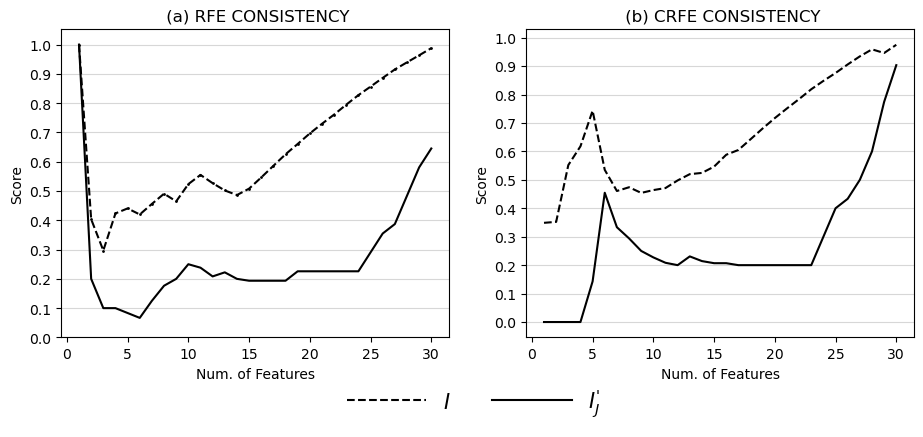

<Figure size 640x480 with 0 Axes>

In [14]:

## Name of file:

file = "31"

coincidences, index_, y = consistency_plotter("RFE_both_" + file)



#fig = plt.figure(figsize=(4, 3), dpi=300)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
# Create the common legend



List_ = []
for i in range( 2, len(index_) ):
    list_ = Partial_coincidence(coincidences, i)[0] 
    list_.reverse()
    List_.append(list_)

# let´s compute the FSR index 
fsr = FSR(List_ )

ax1.plot(y, fsr, label = "new consistency index proposal", marker='o',  markersize=1., linestyle= "--" , color = "black")

#List with percentage of features present in all seeds.

list_full = Partial_coincidence(coincidences, len(index_))[0] 
list_full.reverse()
ax1.plot(y, list_full, label = "$I_J^'$",  linestyle= "-", color = "black")
    
ax1.set_xlabel("Num. of Features")
ax1.set_ylabel("Score")

y_min, y_max = ax1.get_ylim()
y_padding = 0.005 * (y_max - y_min)
ax1.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax1.grid(axis='y', linestyle='-', alpha=0.5)
ax1.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


coincidences, index_, y = consistency_plotter("CRFE_both_" + file)

List_ = []
for i in range( 2, len(index_) ):
    list_ = Partial_coincidence(coincidences, i)[0] 
    list_.reverse()
    List_.append(list_)

# let´s compute the FSR index 
fsr = FSR(List_ )

ax2.plot(y, fsr, label = "$I$",  markersize=1., linestyle= "--", color = "black")

#List with percentage of features present in all seeds.

list_full = Partial_coincidence(coincidences, len(index_))[0] 
list_full.reverse()
ax2.plot(y, list_full, label = "$I_J^'$",  markersize=1., 
         linestyle= "-", color = "black")
    
ax2.set_xlabel("Num. of Features")
ax2.set_ylabel("Score")
#ax2.set_ylabel("Percentage of features")

y_min, y_max = ax2.get_ylim()
y_padding = 0.005 * (y_max - y_min)
ax2.set_ylim(y_min - y_padding, y_max + y_padding)

# Add grid lines
ax2.grid(axis='y', linestyle='-', alpha=0.5)
ax2.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

ax1.set_title(' (a) RFE CONSISTENCY')
ax2.set_title(' (b) CRFE CONSISTENCY')


handles, labels = [], []

h, l = ax2.get_legend_handles_labels()
handles += h
labels += l

fig.legend(handles, labels, loc='lower center', ncol=2, frameon=False, handlelength=3.8, fontsize=15, bbox_to_anchor=(0.5, -0.14))

plt.savefig('../plots/consistency_' + file + '.pdf', bbox_inches='tight')
plt.show()
plt.clf()

